#### Import the all required libraries 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# #Load the file using google colab
# from google.colab import files
# uploaded = files.upload()

##### Load the dataset and do the exploratory/descriptive analysis 

In [7]:
digital = pd.read_csv("K:\Project\ML\MachineLearning\salary.csv")
digital.sample(7)

,age,education.num,capital.gain,hours.per.week,income
21005,23,10,0,20,<=50K
12015,41,13,0,30,<=50K
22008,82,3,0,20,<=50K
21063,72,9,0,1,<=50K
2882,36,14,7298,55,>50K
4651,63,2,0,35,<=50K
15084,25,13,0,40,<=50K


In [9]:
#Check the data types and missing values of dataset
digital.info()
digital.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education.num   32561 non-null  int64 
 2   capital.gain    32561 non-null  int64 
 3   hours.per.week  32561 non-null  int64 
 4   income          32561 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


,age,education.num,capital.gain,hours.per.week,income
count,32561.000000,32561.000000,32561.000000,32561.000000,32561
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,<=50K
freq,NaN,NaN,NaN,NaN,24720
mean,38.581647,10.080679,1077.648844,40.437456,NaN
std,13.640433,2.572720,7385.292085,12.347429,NaN
min,17.000000,1.000000,0.000000,1.000000,NaN
25%,28.000000,9.000000,0.000000,40.000000,NaN
50%,37.000000,10.000000,0.000000,40.000000,NaN
75%,48.000000,12.000000,0.000000,45.000000,NaN


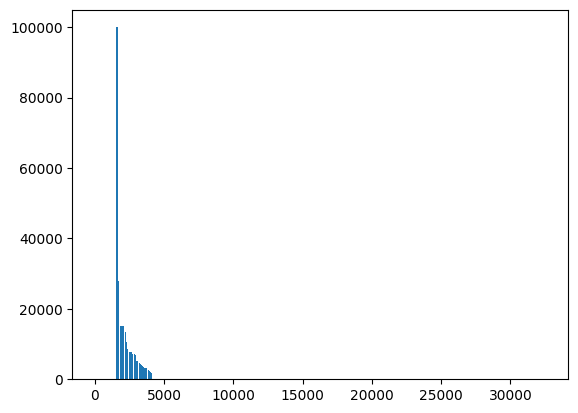

In [12]:
plt.bar(digital.index, digital["capital.gain"])
plt.show()

In [14]:
#Calculate how many rows have Capital.gain as "0" value
zero= 0
greater = 0
for i in digital["capital.gain"]:
    if i <=0:
        zero= zero+1
    else:
        greater = greater+1

print(f" Zero value is {zero}, and greater value is {greater}")

 Zero value is 29849, and greater value is 2712


###### here we can see that only few values contribute to whole dataset, we can either remove this column or we can divide this dataset into two different group one with these values and other without these

##### Convert the Income column from object type to int type

In [18]:
income = set(digital["income"])
digital["income"] = digital["income"].map({"<=50K": 0 , ">50K" : 1}).astype(int)
digital.sample(7)

,age,education.num,capital.gain,hours.per.week,income
26865,81,10,0,4,0
12775,35,13,0,40,0
3537,25,11,3418,40,0
26470,40,10,0,40,0
4657,34,9,0,25,0
4777,34,9,0,45,1
30299,68,10,0,12,1


##### Segreating data into dependent and independent features

In [19]:
X = digital.iloc[:, :-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [20]:
y = digital.iloc[:, -1].values
y

array([0, 0, 0, ..., 1, 0, 0])

##### Split the data into Train and test data

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)
print("Train -",X_train.shape )

Train - (24420, 4)


##### Scaling of the train and test dataset


In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.03932513, -1.57958651, -0.14722748,  3.99956949],
       [-0.99574562,  1.13107604, -0.14722748, -0.04419326],
       [ 1.79994504, -0.03063648, -0.14722748,  0.76455929],
       ...,
       [ 1.21137858, -0.41787399, -0.14722748, -0.04419326],
       [ 0.18138729, -0.03063648, -0.14722748,  0.76455929],
       [-1.21645804, -0.41787399, -0.14722748,  0.76455929]])

##### Finding the best K-value

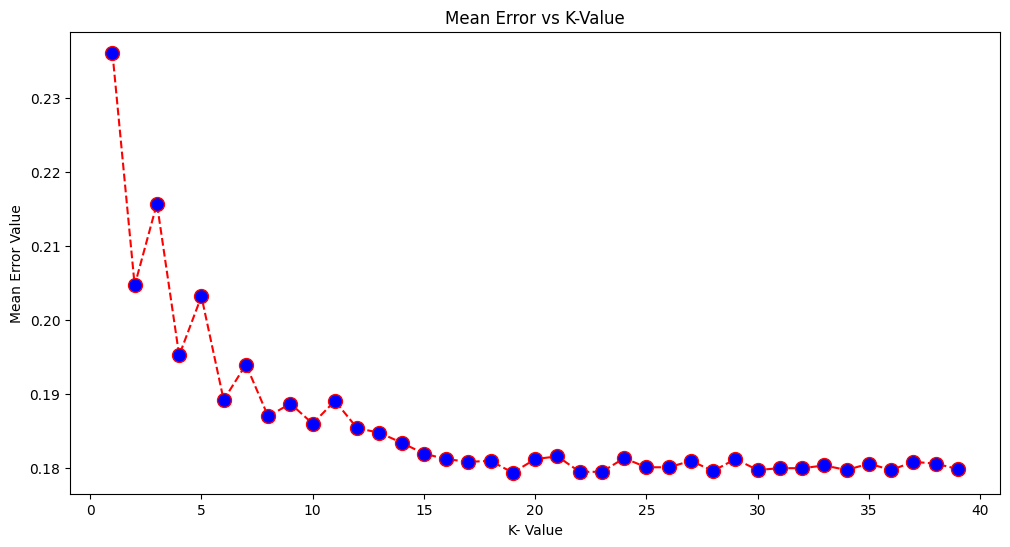

In [29]:
from sklearn.neighbors import KNeighborsClassifier

error = []
for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors= i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color="red", linestyle="dashed", marker="o", markerfacecolor="blue", markersize = 10)
plt.xlabel("K- Value")
plt.ylabel("Mean Error Value")
plt.title("Mean Error vs K-Value")
plt.show()

##### Training

In [30]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=19, metric= "minkowski", p=2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

##### Predicting whether the employee will have Salary greater than 50K or not

In [31]:
age = int(input("Enter age :"))
Edu = int(input("Enter value of Edu 1-16:"))
Capital = int(input("Enter Capital Gain"))
Hours = int(input("Enter value 1-100:"))
newEmp = [[age, Edu, Capital, Hours]]
result = model.predict(sc.transform(newEmp))

if result == 0:
    print("Salary is less than 50K")
else:
    print("Salary is greater than 50K")

Salary is less than 50K


##### Predicting Value for all datasets

In [33]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 1]
 [0 0]
 [0 0]]


##### Evaluation of Model using Confusion Matrix

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :")
print(cm)
print("Accuracy score is", accuracy_score(y_test,y_pred)*100)

Confusion Matrix :
[[5842  355]
 [1105  839]]
Accuracy score is 82.06608524751259
